![satisfaction.png](satisfaction.png)

# <font color='black'>Projeto:</font> <font color='blue'>Prevendo o Nível de Satisfação dos Clientes do Santander.</font>

## <font color='black'>Data:</font> <font color='blue'>julho, 2020</font>

## <font color='black'>Cientista de Dados:</font> <font color='blue'>Walter Trevisan</font>

## 06- Tests (`Step 02`)

Nesta etapa, vamos aplicar os modelos preditivos selecionados (**`Machine Learning`**) em nosso dataset de testes que foi preparado na etapa enterior (`Step 01`), ou seja, o *dataset* **`santander_test_v2.pickle`**.

Portanto, nesta etapa, vamos realizar as seguintes atividades:

1. Carregar o *dataset* de teste: **`santander_test_v2.pickle`**;


2. Carregar os objetos *importantes* criados na fase de *Machine Learning*, ou seja, **`05-Machine-Learning (Step-03)`**;


3. Definir as **`métricas de classificação`** que serão calculadas nesta etapa de testes (**`Step 02`**);


4. Realizar os testes com os algoritmos de classificação selecionados na etapa anterior (**`Machine Learning - Step-03`**):

> 4.1- **`KNN`**: K Nearest Neighbors;

> 4.2- **`RFC`**: Random Forest Classifier;

> 4.3- **`XGBC`**: XGBoost Classifier.


5. Conclusão dos resultados, selecionando o **melhor** ou **melhores** algoritmos de classificação para a próxima fase (**`Produção`**);


6. Salvar as **métricas de classificação** calculadas nesta etapa de testes (**`Step 02`**).

**`Nota`:** o nosso dataset de testes está **`desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**. Portanto, nesta etapa vamos realizar os testes, com os modelos preditivos selecionados, utilizando o dataset **desbalanceado**, e na próxima etapa (**`06-Tests (Step 03)`**) realizaremos novamente os testes com o dataset **balanceado** para compararmos os resultados. 

## Setup

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor.
# Então, vamos desativar essas mensagens.
import sys # O pacote "sys" permite manipulações com o sistema operacional:
import os  # Operation System (Packages and Functions)
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Common imports:
import numpy as np    # NumPy
import pandas as pd   # Pandas
import itertools

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Importa o pacote "seaborn"
import seaborn as sns

# Machine Learning imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Imports para "Avaliação da curva ROC":
from sklearn.metrics import roc_curve, roc_auc_score

# Flag para fazer as previsões nos dados de teste:
# Se "True", faz as previsões utilizando a função.
# Se "False", faz a leitura das previsões (objetos) que foram salvas.
PREDICT=False

# Definindo o diretório raiz (Root) onde serão armazenados todas as informações
# (Imagens, Objetos, Dados, Modelos de ML, etc...) do projeto.
# Diretório Raiz (Root) do Projeto:
PROJECT_ROOT_DIR = "."

# Path: onde serão armazenadas as "Imagens" (Figuras e Gráficos) desta Fase do Projeto:
PROJECT_IMG_PATH = os.path.join(PROJECT_ROOT_DIR, "Images", "06-Tests")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_IMG_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Objetos" (Estrututras de Dados) relacionados ao Projeto:
PROJECT_OBJ_PATH = os.path.join(PROJECT_ROOT_DIR, "Objects")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_OBJ_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Modelos" (Machine Learning) relacionados ao Projeto:
PROJECT_ML_PATH = os.path.join(PROJECT_ROOT_DIR, "Models")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_ML_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "Testes" (Machine Learning) relacionados ao Projeto:
PROJECT_TEST_PATH = os.path.join(PROJECT_ROOT_DIR, "Tests")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_TEST_PATH, exist_ok=True)

# Path: onde ficarão armazenados os "datasets" (arquivos "csv") e os "Objetos" (Data Frames) do Projeto:
PROJECT_DATA_PATH = os.path.join(PROJECT_ROOT_DIR, "Data")
# Criando o diretório, se ele não existir:
os.makedirs(PROJECT_DATA_PATH, exist_ok=True)

# Path: onde estão armazenadas as classes e funções que serão utilizadas neste notebook:
PROJECT_LIB_PATH = os.path.join(PROJECT_ROOT_DIR, "Library")

# Adicionando o diretório ao 'path' do Sistema, para podermos importar classes e funções que serão
# utilizadas neste notebook:
sys.path.append(PROJECT_LIB_PATH)

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Library_v1_0":
import DataScience_Library_v1_0 as dslib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_Plot_Library_v1_0":
import DataScience_Plot_Library_v1_0 as ptlib

# Importando para este notebook, as classes e funções definidas no módulo "DataScience_ML_Library_v1_0":
import DataScience_ML_Library_v1_0 as mllib

# Importando para este notebook, as classes e funções definidas no módulo "DSA_Project_03_Library":
import DSA_Project_03_Library as pjlib

# Criando um objeto para calularmos os tempos de treinamento:
et = dslib.ElapsedTime(builder_msg=False)

print("Setup Complete!")

Setup Complete!


In [2]:
# Versões dos pacotes usados neste jupyter notebook:
%reload_ext watermark
%watermark -a "Walter Trevisan" --iversions

pandas     0.25.3
matplotlib 3.2.1
numpy      1.18.2
seaborn    0.10.0
Walter Trevisan


## `01-` Carregar o *dataset* de `testes`: `santander_test_v2.pickle`

In [3]:
# Carregando o dataset "X_train_v2.pickle" que contém as variáveis preditoras:
test_df = dslib.pickle_object_load(path=PROJECT_DATA_PATH, file="santander_test_v2.pickle",
                                   msg="The 'santander_test_v2' (data frame) has been successfully uploaded!")

The 'santander_test_v2' (data frame) has been successfully uploaded!


In [4]:
# Criando um objeto com o nome das features do data frame de 'testes':
feat_names = list(test_df.columns)
feat_names.remove('Satisfaction') # Removendo a feature TARGET (Satisfaction).
print("Features: {}".format(len(feat_names)))
print(feat_names)

Features: 41
['ind_var30_cat_0', 'ind_var30_cat_1', 'num_var4_cat_0', 'num_var4_cat_1', 'num_var4_cat_2', 'num_var4_cat_3', 'num_var4_cat_4', 'num_var4_cat_5', 'num_var4_cat_6', 'num_var4_cat_7', 'var36_cat_0', 'var36_cat_1', 'var36_cat_2', 'var36_cat_3', 'var36_cat_99', 'num_meses_var5_ult3_cat_0', 'num_meses_var5_ult3_cat_1', 'num_meses_var5_ult3_cat_2', 'num_meses_var5_ult3_cat_3', 'num_meses_var39_vig_ult3_cat_0', 'num_meses_var39_vig_ult3_cat_1', 'num_meses_var39_vig_ult3_cat_2', 'num_meses_var39_vig_ult3_cat_3', 'var38_qt', 'var15_pt', 'num_var35_pt', 'num_var42_pt', 'num_var22_ult3_pt', 'num_var30_pt', 'num_var45_hace2_pt', 'num_var45_hace3_pt', 'num_var45_ult1_pt', 'num_var45_ult3_pt', 'num_var5_pt', 'saldo_var42_pt', 'saldo_var30_pt', 'saldo_medio_var5_hace2_pt', 'saldo_medio_var5_hace3_pt', 'saldo_medio_var5_ult1_pt', 'saldo_medio_var5_ult3_pt', 'saldo_var5_pt']


In [5]:
# Separando as "features" no objeto "X_test" e a variável target (Satisfaction) no objeto "y_test":
X_test = test_df[feat_names].values
y_test = test_df.Satisfaction.values

## `02-` Carregar os `objetos` importantes (`Machine Learning`):

Vamos carregar os seguintes **`objetos`**, criados na fase **`05-Machine Learning`**:

### `2.1-` Objetos que contém as `features` mais importantes (`Feature Selection`) de cada modelo preditivo:

1. **`feat_sel_knn`**: Contém as *features* (mais importantes) selecionadas para o modelo preditivo treinado com o **`KNN`**;

2. **`feat_sel_rfc`**: Contém as *features* (mais importantes) selecionadas para o modelo preditivo treinado com o **`RFC`**;

3. **`feat_sel_xgbc`**: Contém as *features* (mais importantes) selecionadas para o modelo preditivo treinado com o **`XGBC`**.

In [6]:
# 1. Carregando as *features* (mais importantes) selecionadas para o modelo preditivo treinado com o "KNN":
feat_sel_knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfe_feature_selection.pickle",
                                        msg="The features selection for 'KNN' model has been successfully uploaded!")

# 2. Carregando as *features* (mais importantes) selecionadas para o modelo preditivo treinado com o "RFC":
feat_sel_rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_rfc_v1.pickle",
                                        msg="The features selection for 'RFC' model has been successfully uploaded!")

# 3. Carregando as *features* (mais importantes) selecionadas para o modelo preditivo treinado com o "XGBC":
feat_sel_xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rfecv_xgbc_v1.pickle",
                                         msg="The features selection for 'XGBC' model has been successfully uploaded!")

The features selection for 'KNN' model has been successfully uploaded!
The features selection for 'RFC' model has been successfully uploaded!
The features selection for 'XGBC' model has been successfully uploaded!


### `2.2-` Objetos que contém os `modelos preditivos` treinados com os melhores `hiperparâmetros`:

1. **`knn`**: Modelo preditivo do algorito **`KNN`** com os melhores hiperparâmetros selecionados;

2. **`rfc`**: Modelo preditivo do algorito **`RFC`** com os melhores hiperparâmetros selecionados;

3. **`xgbc`**: Modelo preditivo do algorito **`XGBC`** com os melhores hiperparâmetros selecionados.

In [7]:
# 1. Carregando o modelo "KNN" com os melhores hiperparâmetros selecionados:
knn = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="grd_search_knn_v2.pickle",
                               msg="The best 'KNN' model has been successfully uploaded!")

# 2. Carregando o modelo "RFC" com os melhores hiperparâmetros selecionados:
rfc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="grd_search_rfc_v2.pickle",
                               msg="The best 'RFC' model has been successfully uploaded!")

# 3. Carregando o modelo "XGBC" com os melhores hiperparâmetros selecionados:
xgbc = dslib.pickle_object_load(path=PROJECT_ML_PATH, file="rnd_search_xgbc_v2.pickle",
                                msg="The best 'XGBC' model has been successfully uploaded!")

The best 'KNN' model has been successfully uploaded!
The best 'RFC' model has been successfully uploaded!
The best 'XGBC' model has been successfully uploaded!


## `03-` Definição das `Métricas de Classificação`:

### Métricas: `Accuracy`, `Precision`, `Recall`, `f1-score` e `ROC Curve (AUC)`

### `Accuracy`:

A **acurácia** do modelo mede a taxa de acertos das classes ***True Positive*** e ***True Negative***, sendo calculada pela fórmula abaixo:

**`Accuracy = (TP + TN)/(TP + TN + FP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`TN`** é o número de ***verdadeiros negativos***;

3. **`FP`** é o número de ***falsos positivos***.

4. **`FN`** é o número de ***falsos negativos***.

Um classificador perfeito teria apenas *verdadeiros positivos* (**TP**) e *verdadeiros negativos* (**TN**), ou seja, sua **matriz de confusão** teria valores diferentes de zero somente na sua diagonal principal (superior esquerda para a inferior direita), ou seja, a sua acurácia (**`accuracy`**) seria de **100%**.

### `Precision`:

Uma outra métrica interessante a ser observada na ***matriz de confusão*** é a `acurácia das previsões positivas`; que é chamada de ***precisão (precision)*** do classificador e é calculada pela fórmula abaixo:

**`Precision = TP/(TP + FP)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FP`** é o número de ***falsos positivos***.

### `Recall`:

Entretanto, a precisão é utilizada em conjunto com outra métrica chamada ***revocação (recall)***, também conhecida como ***sensibilidade*** ou ***taxa de verdadeiros positivos (TPR)***: esta é a taxa de `instâncias positivas que são corretamente detectadas` pelo classificador, sendo calculada pel fórmula abaixo:

**`Recall = TP/(TP + FN)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***.

### `f1-score`:

Muitas vezes, é conveniente combinarmos **precisão** e **revocação** em uma única métrica chamada ***pontuação F1 (f1 score)***, principalmente se precisarmos comparar dois ou mais classificadores.

A ***pontuação F1*** é a ***média harmônica*** da **precisão** e **revocação**, sendo calculada pela fórmula abaixo:

**`F1 = TP/(TP + (FN + FP)/2)`**, onde:

1. **`TP`** é o número de ***verdadeiros positivos***;

2. **`FN`** é o número de ***falsos negativos***;

3. **`FP`** é o número de ***falsos positivos***.

Enquanto a média regular trata igualmente todos os valores, a média harmônica dá muito mais peso aos valores mais baixos, ou seja, o classificador só obterá uma ***pontuação F1*** alta, se a **revocação** e a **precisão** forem altas.

### `ROC Curve (AUC)`

A curva **ROC** (*características operacionais do receptor*) é outra ferramenta comum utilizada com classificadores binários. É muito semelhante à curva de **`precision/recall`**, mas, em vez de plotar a **precision versus recall**, a curva **ROC** plota a *taxa de verdadeiros positivos* (***TPR = True Positive Rate***), que é um outro nome dado para ***recall***, versus a *taxa de falsos positivos* (***FPR = False Positive Rate***). O ***FPR*** é a razão de instâncias negativas incorretamente classificadas como positivas. É igual a 1 menos *taxa de verdadeiros negativos* (***TNR = True Negative Rate***), que é a razão de instâncias negativas que são corretamente classificadas como negativas. A ***TNR*** também é chamada de ***especificidade***.

Portanto, a ***Curva ROC*** plota a ***`sensibilidade (recall)` versus `1 - especificidade`***.

Equações:

1. **`TPR = TP/(TP + FN)`** --> ***True Positive Rate***, ou também ***`recall`*** ou também ***`sensibilidade`***

2. **`FPR = FP/(FP + TN)`** --> ***False Positive Rate***

3. **`TNR = TN/(TN + FP)`** --> ***True Negative Rate***, ou também ***especificidade***

4. **`FPR = 1 - TNR`** ou também **`FPR = 1 - especificidade`**

Então, para plotarmos a ***ROC curve***, primeiro precisamos calcular a **TPR** e a **FPR** para vários valores de ***thresholds*** (limiares) utilizando a função ***`roc_curve()`***.

Mas, a função `roc_curve()` utiliza as **pontuações de decisão** (ao invés das previsões) de todas as instâncias do nosso dataset, ou seja, precisamos primeiro calcular estas pontuações (`scores`) de decisão utilizando o método `decision_function` da função `cross_val_predict()`.

Entretando, devido ao modo como funcionam, alguns classificadores (por exemplo: a classe `KNeighborsClassifier`) não possuem um método `decision_function()`. Em vez disso, eles possuem um método chamado `predict_proba()`. Este método retorna um array que contém uma linha por instância e uma coluna por classe, cada uma contendo a probabilidade de a instância dada pertencer à classe dada (por exemplo, neste projeto, 70% de chance de um cliente estar insatisfeito). Portanto, quando utilizarmos estes classificadores, primeiro precisaremos calcular as probabilidades com o método `predict_proba()`, e, então, em seguida calcularemos as *pontuações de decisão* utilizando a probabilidade da classe positiva como sendo a pontuação.

Observando o gráfico da **Curva ROC**, quanto maior a ***`TPR (recall)`***, mais falsos positivos (***`FPR`***) o classificador produz, ou seja, menor é a sua **precisão** (***`precision`***). A linha pontilhada representa a curva ROC de um classificador puramente aleatório; um bom classificador fica mais distante dessa linha possível (em direção ao canto superior esquerdo)!

Uma forma de compararmos dois ou mais classificadores é medirmos a **área abaixo da curva** (***`AUC = Area Under Curve`***). Um classificador perfeito terá um ***`ROC AUC = 1`***, enquanto que um classificador puramente aleatório terá um ***`ROC AUC = 0.5`***.

Portanto, vamos criar um objeto do tipo *data frame* para armazenar as seguintes métricas de classificação, para cada algorítimo de *machine learning* selecionado para esta etapa, a saber: **`Accuracy`**, **`Precision`**, **`Recall`**, **`f1-score`** e **`AUC`**:

In [8]:
# Agora, vamos criar um data frame onde serão armazenadas as métricas de classificação dos algoritmos selecionados:
classif_metrics_df = pd.DataFrame(data={}, columns=['Accuracy', 'Precision', 'Recall', 'f1-score', 'AUC'],
                                  index=['KNN', 'RFC', 'XGBC'])

# Define um nome para os índices:
classif_metrics_df.index.name = 'Models'

# Mostrando o data frame criado:
classif_metrics_df

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
KNN,NaN,NaN,NaN,NaN,NaN
RFC,NaN,NaN,NaN,NaN,NaN
XGBC,NaN,NaN,NaN,NaN,NaN


## `04-` Realizar os `testes` nos `modelos preditivos (ML)` selecionados:

## `4.1-` [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (K Nearest Neighbors):

### `Feature Selection`:

Vamos utilizar as *features* selecionadas (**`importantes`**), que foram definidas na fase anterior (**`05-Machine Learning`**).

In [9]:
# Selecionando os dados de teste, de acordo com as features selecionadas (Importantes) na fase anterior (ML):
X_test_knn = X_test[:, feat_sel_knn.get_support()]
print("X_test_knn (shape):",X_test_knn.shape)

X_test_knn (shape): (15204, 20)


### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais.

In [10]:
# Calculando as previsões nos dados de teste:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (PREDICT): # Utilizar "PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting predict (KNN)..."))
    y_test_pred_knn = knn.predict(X=X_test_knn)
    
    # Fim das previsões:
    et.end(msg="Time consumed for predict (KNN):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="y_test_pred_knn.pickle", object_name=y_test_pred_knn,
                              msg="The predicts (tests) with 'KNN' model was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_test_pred_knn.pickle":
    y_test_pred_knn = dslib.pickle_object_load(path=PROJECT_TEST_PATH, file="y_test_pred_knn.pickle",
                                               msg="The predicts (tests) with 'KNN' model has been successfully uploaded!")

The predicts (tests) with 'KNN' model has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`KNN`**, foi de **3.27 segundos**.

Saving figure: plot_confusion_matrix_knn


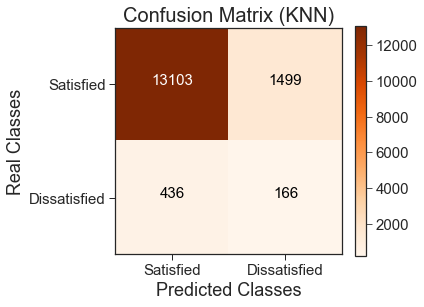

In [11]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_test, pred=y_test_pred_knn, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (KNN)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_knn', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 13103`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 1499`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 436`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 166`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [12]:
# Calculando e mostrando as métricas de classificação com o "KNN":
print("Metrics of 'KNN' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_test, y_pred=y_test_pred_knn, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['KNN', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['KNN', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['KNN', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['KNN', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'KNN' model:
Accuracy = 0.8727
Precision = 0.0997
Recall = 0.2757
f1-score = 0.1464


**Análise:**

1. com o classificador **`KNN`** obtivemos uma taxa de **acurácia** de **87.27%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`KNN`** apresentou um resultado **`insatisfatório`**, ***abaixo do mínimo desejado***;


2. com o nosso classificador **`KNN`** obtivemos uma taxa de **precisão** de **9.97%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`KNN`** obtivemos uma taxa de **revocação** de **27.57%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`KNN`** apresentou um resultado ***muito abaixo do mínimo desejado***;


4. com o classificador **`KNN`** obtivemos uma **`pontuação F1`** **muito baixa**, devido as baixas taxas de **precisão** e **revocação**.

**`Nota`:** obtivemos taxas **muito baixas** para as métricas **`Precision`**, **`Recall`** e **`f1-score`**. Isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

### `Curva ROC`

In [13]:
# Calculando as 'pontuações de decisão' nos dados de teste:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (PREDICT): # Utilizar "PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (KNN)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_knn = knn.predict_proba(X=X_test_knn)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_knn = y_probas_knn[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (KNN):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="y_dec_scores_knn.pickle", object_name=y_dec_scores_knn,
                              msg="The decision scores (KNN) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_knn.pickle":
    y_dec_scores_knn = dslib.pickle_object_load(path=PROJECT_TEST_PATH, file="y_dec_scores_knn.pickle",
                                                msg="The decision scores (KNN) has been successfully uploaded!")

The decision scores (KNN) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`KNN`**, foi de **2.72 segundos**.

In [14]:
# Calculando o "FPR" e "TPR":
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_dec_scores_knn)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_test, y_dec_scores_knn)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['KNN', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_knn


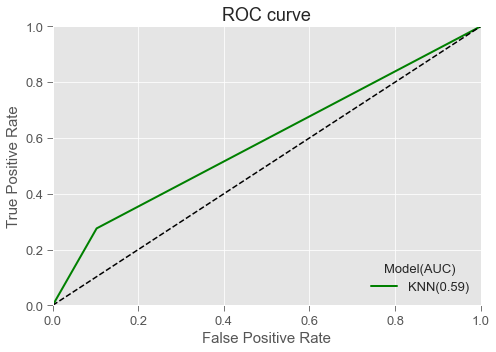

In [15]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr_knn, tpr_knn, auc=auc, auc_decimals=2, plot_style='ggplot', color='green', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='KNN', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_knn', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`KNN`** apresentou uma ***`ROC curve`*** **muito distante** do *canto superior esquerdo*. Isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

## `4.2-` [RFC](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (Random Forest Classifier):

### `Feature Selection`:

Vamos utilizar as *features* selecionadas (**`importantes`**), que foram definidas na fase anterior (**`05-Machine Learning`**).

In [16]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes) na fase anterior (ML):
X_test_rfc = X_test[:, feat_sel_rfc.get_support()]
print("X_test_rfc (shape):",X_test_rfc.shape)

X_test_rfc (shape): (15204, 28)


### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais.

In [17]:
# Calculando as previsões nos dados de teste:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (PREDICT): # Utilizar "PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting predict (RFC)..."))
    y_test_pred_rfc = rfc.predict(X=X_test_rfc)
    
    # Fim das previsões:
    et.end(msg="Time consumed for predict (RFC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="y_test_pred_rfc.pickle", object_name=y_test_pred_rfc,
                              msg="The predicts (tests) with 'RFC' model was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_test_pred_rfc.pickle":
    y_test_pred_rfc = dslib.pickle_object_load(path=PROJECT_TEST_PATH, file="y_test_pred_rfc.pickle",
                                               msg="The predicts (tests) with 'RFC' model has been successfully uploaded!")

The predicts (tests) with 'RFC' model has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`RFC`**, foi de **0.31 segundos**.

Saving figure: plot_confusion_matrix_rfc


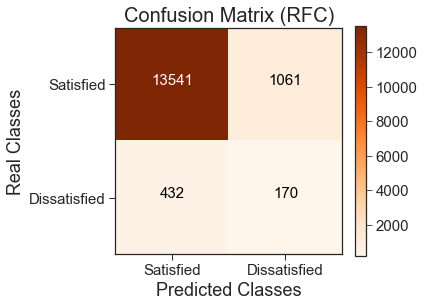

In [18]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_test, pred=y_test_pred_rfc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (RFC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_rfc', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 13541`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 1061`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 432`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 170`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall`, e `f1-score`

In [19]:
# Calculando e mostrando as métricas de classificação com o "KNN":
print("Metrics of 'RFC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_test, y_pred=y_test_pred_rfc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['RFC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['RFC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['RFC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['RFC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'RFC' model:
Accuracy = 0.9018
Precision = 0.1381
Recall = 0.2824
f1-score = 0.1855


**Análise:**

1. com o classificador **`RFC`** obtivemos uma taxa de **acurácia** de **90.18%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`RFC`** apresentou um resultado **`satisfatório`**, ***praticamente igual ao mínimo desejado***;


2. com o nosso classificador **`RFC`** obtivemos uma taxa de **precisão** de **13.81%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`RFC`** obtivemos uma taxa de **revocação** de **28.24%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`RFC`** apresentou um resultado ***muito abaixo do mínimo desejado***;


4. com o classificador **`RFC`** obtivemos uma **`pontuação F1`** **muito baixa**, devido as baixas taxas de **precisão** e **revocação**.

**`Nota`:** obtivemos taxas **muito baixas** para as métricas **`Precision`**, **`Recall`** e **`f1-score`**. Isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

### `Curva ROC`

In [20]:
# Calculando as 'pontuações de decisão' nos dados de teste:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (PREDICT): # Utilizar "PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (RFC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_rfc = rfc.predict_proba(X=X_test_rfc)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_rfc = y_probas_rfc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (RFC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="y_dec_scores_rfc.pickle", object_name=y_dec_scores_rfc,
                              msg="The decision scores (RFC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_rfc.pickle":
    y_dec_scores_rfc = dslib.pickle_object_load(path=PROJECT_TEST_PATH, file="y_dec_scores_rfc.pickle",
                                                msg="The decision scores (RFC) has been successfully uploaded!")

The decision scores (RFC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`RFC`**, foi de **0.21 segundos**.

In [21]:
# Calculando o "FPR" e "TPR":
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_dec_scores_rfc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_test, y_dec_scores_rfc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['RFC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_rfc


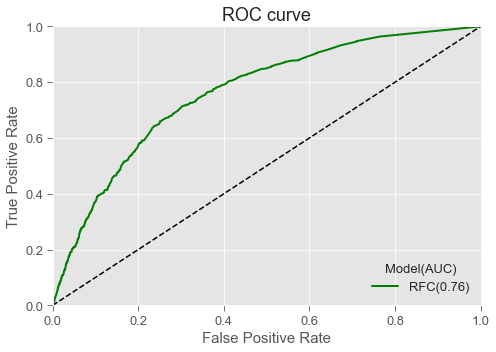

In [22]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr_rfc, tpr_rfc, auc=auc, auc_decimals=2, plot_style='ggplot', color='green', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='RFC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_rfc', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:**

Podemos observar que o nosso classificador **`RFC`** apresentou uma ***`ROC curve`*** **muito distante** do *canto superior esquerdo*. Isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

## `4.3-` [XGBC](https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier) (XGBoost Classifier):

### `Feature Selection`:

Vamos utilizar as *features* selecionadas (**`importantes`**), que foram definidas na fase anterior (**`05-Machine Learning`**).

In [23]:
# Selecionando os dados de treinamento, de acordo com as features selecionadas (Importantes) na fase anterior (ML):
X_test_xgbc = X_test[:, feat_sel_xgbc.get_support()]
print("X_test_xgbc (shape):",X_test_xgbc.shape)

X_test_xgbc (shape): (15204, 32)


### `Matriz de Confusão`

Para calcularmos a ***Confusion Matrix***, primeiro precisamos ter um conjunto de previsões que possam ser comparadas com os valores (*labels*) reais.

In [24]:
# Calculando as previsões nos dados de teste:
# Verifica se vamos fazer as previsões utilizando "validação cruzada":
if (PREDICT): # Utilizar "PREDICT=True" (no Setup) para fazer as 'previsões'!
    # Inicia as previsões:
    et.start(et.start(msg="Starting predict (XGBC)..."))
    y_test_pred_xgbc = xgbc.predict(X=X_test_xgbc)
    
    # Fim das previsões:
    et.end(msg="Time consumed for predict (XGBC):")
    
    # Salvando as previsões:
    dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="y_test_pred_xgbc.pickle", object_name=y_test_pred_xgbc,
                              msg="The predicts (tests) with 'XGBC' model was successfully saved!")
else:
    # As previsões já foram feitas!
    # Carregando as previsões "y_test_pred_xgbc.pickle":
    y_test_pred_xgbc = dslib.pickle_object_load(path=PROJECT_TEST_PATH, file="y_test_pred_xgbc.pickle",
                                                msg="The predicts (tests) with 'XGBC' model has been successfully uploaded!")

The predicts (tests) with 'XGBC' model has been successfully uploaded!


**Análise:** o tempo consumido para fazermos as **`previsões`**, com o modelo **`XGBC`**, foi de **0.12 segundos**.

Saving figure: plot_confusion_matrix_xgbc


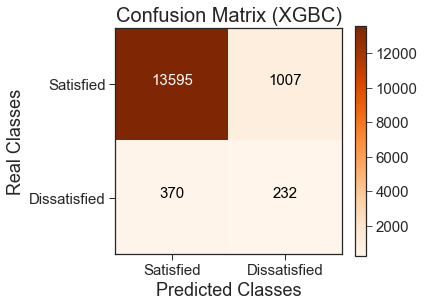

In [25]:
# Plot da "Confusion Matrix":
target_names = ['Satisfied', 'Dissatisfied']
ptlib.plot_confusion_matrix(truth=y_test, pred=y_test_pred_xgbc, display_labels=target_names, normalize=False,
                            plot_style='seaborn-ticks', colors=plt.cm.Oranges, title="Confusion Matrix (XGBC)",
                            title_fontsize=20, labels_fontsize=18, ticks_fontsize=15, values_fontsize=15, rotation=0,
                            width=6, height=6, figure_id='plot_confusion_matrix_xgbc', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                           )

**Análise:**

Cada **linha** em uma **Matriz de Confusão** representa uma **Classe Real**, enquanto que cada **coluna** representa uma **Classe Prevista**. Portanto, a primeira linha considera os clientes **Satisfeitos** (a classe negativa) e a segunda linha considera os clientes **Insatisfeitos** (a classe positiva). A primeira coluna considera os clientes preditos como **Satisfeitos** (a classe negativa) e a segunda coluna considera os clientes preditos como **Insatisfeitos** (a classe positiva).

Sendo assim, temos no gráfico **`Confusion Matrix`** os seguintes valores:

1. **`TN = 13595`** (**True Negative**): são os clientes que foram classificados (preditos) `corretamente` como `Satisfeitos`;

2. **`FP = 1007`** (**False Positive**): são os clientes que foram classificados (preditos) `erroneamente` como `Insatisfeitos` (na verdade os clientes estão *Satisfeitos*);

3. **`FN = 370`** (**False Negative**): são os clientes que foram classificados (preditos) `erroneamente` como `Satisfeitos` (na verdade os clientes estão *Insatisfeitos*);

4. **`TP = 232`** (**True Positive**): são os clientes que foram classificados (preditos) `corretamente` como `Insatisfeitos`.

### Métricas: `Accuracy`, `Precision`, `Recall` e `f1-score`

In [26]:
# Calculando e mostrando as métricas de classificação com o "XGBC":
print("Metrics of 'XGBC' model:")
accuracy, precision, recall, F1_score = mllib.classif_metrics(y_real=y_test, y_pred=y_test_pred_xgbc, metric='All')

# Armazenando as métricas calculadas no data frame:
classif_metrics_df.loc['XGBC', 'Accuracy'] = np.round(accuracy, decimals=4)
classif_metrics_df.loc['XGBC', 'Precision'] = np.round(precision, decimals=4)
classif_metrics_df.loc['XGBC', 'Recall'] = np.round(recall, decimals=4)
classif_metrics_df.loc['XGBC', 'f1-score'] = np.round(F1_score, decimals=4)

Metrics of 'XGBC' model:
Accuracy = 0.9094
Precision = 0.1872
Recall = 0.3854
f1-score = 0.2520


**Análise:**

1. com o classificador **`XGBC`** obtivemos uma ótima taxa de **acurácia** de **90.94%**, ou seja, é a porcentagem de clientes **satisfeitos** e **insatisfeitos** que foram classificados corretamente por ele. Em nosso projeto, o objetivo é entregarmos uma **acurácia** que seja, no **mínimo**, de **90%**. Portanto, o nosso classificador **`XGBC`** apresentou um resultado **`satisfatório`**, ***um pouco acima do mínimo desejado***;


2. com o nosso classificador **`XGBC`** obtivemos uma taxa de **precisão** de **18.72%**, ou seja, é a porcentagem de clientes **insatisfeitos** que foram classificados corretamente por ele;


3. com o nosso classificador **`XGBC`** obtivemos uma taxa de **revocação** de **38.54%**, ou seja, é a porcentagem de clientes **insatisfeitos** que ele conseguiu detectar. Em nosso projeto, o objetivo é entregarmos uma taxa de **revocação** que seja, no **mínimo**, de **85%**. Portanto, o nosso classificador **`XGBC`** apresentou um resultado ***muito abaixo do mínimo desejado***;


4. com o classificador **`XGBC`** obtivemos uma **`pontuação F1`** **muito baixa**, devido as baixas taxas de **precisão** e **revocação**.

**`Nota`:** obtivemos taxas **muito baixas** para as métricas **`Precision`**, **`Recall`** e **`f1-score`**. Isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

### `Curva ROC`

In [27]:
# Calculando as 'pontuações de decisão' nos dados de teste:
# Verifica se vamos fazer os cálculos utilizando "validação cruzada":
if (PREDICT): # Utilizar "PREDICT=True" (no Setup) para calcular as pontuações de decisão:
    # Inicia o cálculo das pontuações de decisão:
    et.start(et.start(msg="Starting the calculations of decision scores (XGBC)..."))
    
    # Primeiro, calcularemos as probabilidades de cada classe:
    y_probas_xgbc = xgbc.predict_proba(X=X_test_xgbc)
    
    # Agora, vamos utilizar as probabilidades da classe positiva (1) como sendo as pontuações de decisão:
    y_dec_scores_xgbc = y_probas_xgbc[:, 1]
    
    # Fim do cálculo das pontuações de decisão:
    et.end(msg="Time consumed for the calculations of decision scores (XGBC):")
    
    # Salvando as pontuações de decisão:
    dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="y_dec_scores_xgbc.pickle", object_name=y_dec_scores_xgbc,
                              msg="The decision scores (XGBC) was successfully saved!")
else:
    # Os cálculos das pontuações de decisão já foram feitas!
    # Carregando as pontuações de decisão "y_dec_scores_xgbc.pickle":
    y_dec_scores_xgbc = dslib.pickle_object_load(path=PROJECT_TEST_PATH, file="y_dec_scores_xgbc.pickle",
                                                 msg="The decision scores (XGBC) has been successfully uploaded!")

The decision scores (XGBC) has been successfully uploaded!


**Análise:** o tempo consumido para calcularmos as **`pontuações de decisão`**, com o modelo **`XGBC`**, foi de **0.12 segundos**.

In [28]:
# Calculando o "FPR" e "TPR":
fpr_xgbc, tpr_xgbc, thresholds_xgbc = roc_curve(y_test, y_dec_scores_xgbc)

# Calculando a "Area Under Curve" (AUC):
auc = roc_auc_score(y_test, y_dec_scores_xgbc)

# Armazenando a métrica ('AUC') no data frame:
classif_metrics_df.loc['XGBC', 'AUC'] = np.round(auc, decimals=4)

Saving figure: plot_roc_curve_xgbc


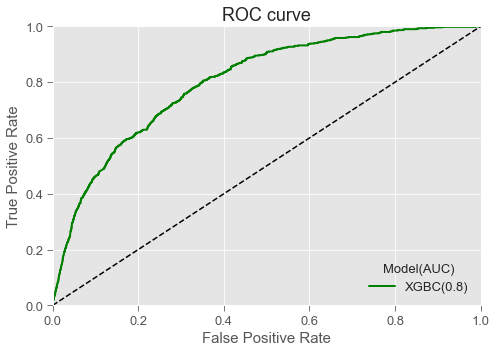

In [29]:
# Plot da "Curva ROC":
ptlib.plot_roc_curve(fpr_xgbc, tpr_xgbc, auc=auc, auc_decimals=2, plot_style='ggplot', color='green', line_width=2,
                     title='ROC curve', title_fontsize=18, labels_fontsize=15, ticks_fontsize=13,
                     legendtitle='Model(AUC)', legendtitle_fontsize=13, legend_label='XGBC', legend_fontsize=13,
                     width=7, height=5, figure_id='plot_roc_curve_xgbc', figure_path=PROJECT_IMG_PATH,
                     figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                    )

**Análise:** 

Podemos observar que o nosso classificador **`XGBC`** apresentou uma ***`ROC curve`*** **muito distante** do *canto superior esquerdo*. Isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

### Comparando as `Curvas ROC` entre os modelos:

In [30]:
# Criando um objeto 'dicionário' para os valores "FPR", calculados, de cada modelo:
fpr_dic = {'KNN': fpr_knn, 'RFC': fpr_rfc, 'XGBC': fpr_xgbc}

# Criando um objeto 'dicionário' para os valores "TPR", calculados, de cada modelo:
tpr_dic = {'KNN': tpr_knn, 'RFC': tpr_rfc, 'XGBC': tpr_xgbc}

Saving figure: plot_roc_curves_models


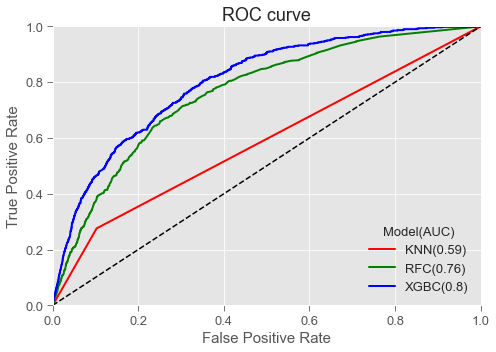

In [31]:
# Plot das "Curvas ROC":
ptlib.plot_roc_curves(fpr=fpr_dic, tpr=tpr_dic, auc=classif_metrics_df[['AUC']], auc_decimals=2, plot_style='ggplot',
                      color=['red', 'green', 'blue'], line_width=2, scales=None, title='ROC curve', title_fontsize=18,
                      labels_fontsize=15, ticks_fontsize=13, legendtitle='Model(AUC)', legendtitle_fontsize=13,
                      legend_label=['KNN', 'RFC', 'XGBC'], legend_fontsize=13, width=7, height=5,
                      figure_id='plot_roc_curves_models', figure_path=PROJECT_IMG_PATH,
                      figure_file_format="png", figure_file_extension=".png", tight_layout=True, dpi=300
                     )

**Análise:**

Podemos observar que os `03 modelos` não apresentaram resultados satisfatórios, sendo que o modelo **`XGBC`** conseguiu o melhor resultado nesta métrica (**`AUC=0.80`**).

## `05-` Conclusão:

Agora, vamos plotar um gráfico comparando as taxas de acurácia (**`Accuracy`**) e as taxas de revocação (**`Recall`**), de cada modelo preditivo:

Saving figure: plot_models_vs_accuracy


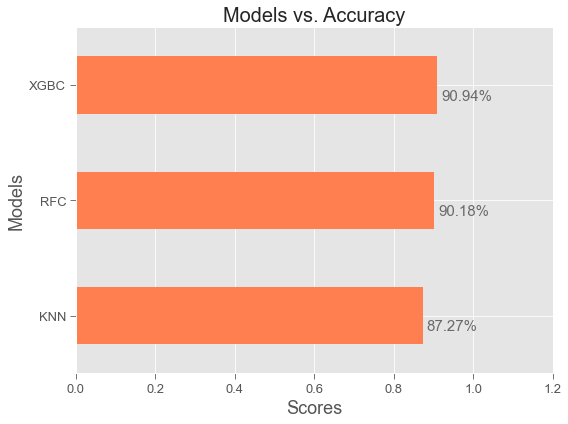

Saving figure: plot_models_vs_recall


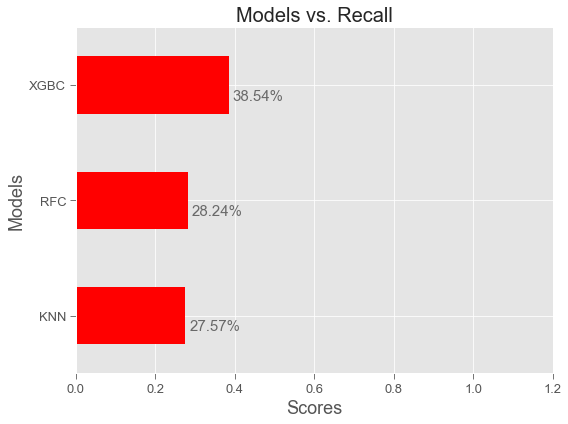

In [32]:
# Classificando as taxas de acurácia:
models_accuracy = classif_metrics_df['Accuracy'].sort_values(ascending=False)

# Plot:
ptlib.plot_models_vs_scores(scores=models_accuracy, plot_style='ggplot', bar_color='coral', alpha=0.8,
                            score_color='dimgrey', score_fontsize=15, title="Models vs. Accuracy",
                            title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
                            ylabel_fontsize=18, ticks_fontsize=13, width=8, height=6,
                            figure_id='plot_models_vs_accuracy', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png",
                            tight_layout=True, dpi=300
                           )

# Classificando as taxas de revocação:
models_recall = classif_metrics_df['Recall'].sort_values(ascending=False)

# Plot:
ptlib.plot_models_vs_scores(scores=models_recall, plot_style='ggplot', bar_color='red', alpha=0.8,
                            score_color='dimgrey', score_fontsize=15, title="Models vs. Recall",
                            title_fontsize=20, xlabel="Scores", xlabel_fontsize=18, ylabel='Models',
                            ylabel_fontsize=18, ticks_fontsize=13, width=8, height=6,
                            figure_id='plot_models_vs_recall', figure_path=PROJECT_IMG_PATH,
                            figure_file_format="png", figure_file_extension=".png",
                            tight_layout=True, dpi=300
                           )

**Análise:**

**`Accuracy`:** de acordo com os objetivos do projeto (**`Accuracy = 90%`**), podemos observar que os modelos que apresentaram um resultado **`satisfatório`** foram: **`XGBC`** (***XGBoost Classifier***) e **`RFC`** (***Random Forest Classifier***).

**`Recall`:** de acordo com os objetivos do projeto (**`Recall = 85%`**), podemos observar que **todos** os modelos apresentaram uma performance **muito abaixo do mínimo desejado**. Como já dissemos, isto ocorreu devido ao nosso dataset de testes estar **`muito desbalanceado`**, ou seja, temos apenas **`4%`** de clientes classificados como **`Insatisfeitos`**.

## `06-` Salvar as `métricas de classificação` calculadas nesta etapa:

In [33]:
# Mostrar as métricas de classificação calculadas nesta etapa:
classif_metrics_df

,Accuracy,Precision,Recall,f1-score,AUC
Models,,,,,
KNN,0.8727,0.0997,0.2757,0.1464,0.5865
RFC,0.9018,0.1381,0.2824,0.1855,0.762
XGBC,0.9094,0.1872,0.3854,0.252,0.8026


In [34]:
# Salvando as métricas de classificação:
dslib.pickle_object_save (path=PROJECT_TEST_PATH, file="classif_metrics_df.pickle", object_name=classif_metrics_df,
                          msg="The 'classif_metrics_df' (metrics) has been successfully saved!")

The 'classif_metrics_df' (metrics) has been successfully saved!


## <font color='black'>FIM</font>